# Sequence generation model for replicating phraseological patterns from an homegenous political group.

BEKKAR-CHRIMNI

#### Downloading required packages

In [ ]:
!pip install unidecode

     |████████████████████████████████| 235 kB 5.5 MB/s 


In [ ]:
!pip install transformers==4.2.2

     |████████████████████████████████| 1.8 MB 5.6 MB/s 
     |████████████████████████████████| 895 kB 36.5 MB/s 
     |████████████████████████████████| 2.9 MB 34.0 MB/s 


In [ ]:
!pip install bert_score

     |████████████████████████████████| 60 kB 2.6 MB/s 


In [ ]:
!pip install xlrd==2.0.1

     |████████████████████████████████| 96 kB 2.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


#### Downloading required data

###### Tweets dataset

In [ ]:
!wget https://github.com/NLP-ENSAE-3A/French-Poltical-Tweets-Generation/raw/main/tweets_extract.csv

--2022-04-23 23:02:22--  https://github.com/NLP-ENSAE-3A/French-Poltical-Tweets-Generation/raw/main/tweets_extract.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/NLP-ENSAE-3A/French-Political-Tweets-Generation/raw/main/tweets_extract.csv [following]
--2022-04-23 23:02:22--  https://github.com/NLP-ENSAE-3A/French-Political-Tweets-Generation/raw/main/tweets_extract.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/NLP-ENSAE-3A/French-Political-Tweets-Generation/main/tweets_extract.csv [following]
--2022-04-23 23:02:22--  https://raw.githubusercontent.com/NLP-ENSAE-3A/French-Political-Tweets-Generation/main/tweets_extract.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.1

In [ ]:
!wget https://github.com/NLP-ENSAE-3A/French-Poltical-Tweets-Generation/raw/main/clean_tweets_df.csv

--2022-04-23 23:02:24--  https://github.com/NLP-ENSAE-3A/French-Poltical-Tweets-Generation/raw/main/clean_tweets_df.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/NLP-ENSAE-3A/French-Political-Tweets-Generation/raw/main/clean_tweets_df.csv [following]
--2022-04-23 23:02:24--  https://github.com/NLP-ENSAE-3A/French-Political-Tweets-Generation/raw/main/clean_tweets_df.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/NLP-ENSAE-3A/French-Political-Tweets-Generation/main/clean_tweets_df.csv [following]
--2022-04-23 23:02:24--  https://raw.githubusercontent.com/NLP-ENSAE-3A/French-Political-Tweets-Generation/main/clean_tweets_df.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 

In [ ]:
!wget https://github.com/NLP-ENSAE-3A/French-Political-Tweets-Generation/raw/main/clean_tweets.csv

--2022-04-23 23:05:40--  https://github.com/NLP-ENSAE-3A/French-Political-Tweets-Generation/raw/main/clean_tweets.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/NLP-ENSAE-3A/French-Political-Tweets-Generation/main/clean_tweets.csv [following]
--2022-04-23 23:05:41--  https://raw.githubusercontent.com/NLP-ENSAE-3A/French-Political-Tweets-Generation/main/clean_tweets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4415606 (4.2M) [text/plain]
Saving to: ‘clean_tweets.csv’

clean_tweets.csv    100%[===================>]   4.21M  --.-KB/s    in 0.1s    

2022-04-23 23:05:41 (36.5 MB/s) - ‘cl

In [ ]:
!wget https://github.com/NLP-ENSAE-3A/French-Political-Tweets-Generation/raw/main/img/twitter_logo.jpg

--2022-04-23 23:40:12--  https://github.com/NLP-ENSAE-3A/French-Political-Tweets-Generation/raw/main/img/twitter_logo.jpg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/NLP-ENSAE-3A/French-Political-Tweets-Generation/main/img/twitter_logo.jpg [following]
--2022-04-23 23:40:12--  https://raw.githubusercontent.com/NLP-ENSAE-3A/French-Political-Tweets-Generation/main/img/twitter_logo.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32756 (32K) [image/jpeg]
Saving to: ‘twitter_logo.jpg.1’

twitter_logo.jpg.1  100%[===================>]  31.99K  --.-KB/s    in 0.002s  

2022-04-23 23:40:12 (15.6 

######LSTM Trained Model

In [ ]:
!wget https://public.am.files.1drv.com/y4mmMOMD2ydgmWllk8E_1cU9dZvm1VTOC6gzs6GIDdCskilyuY5UGKjhVmvNhGLi1cPA4PK2eQyQ-Clqzw4iZ-9N2lzl6F8LpI0HenxyFsrZiypiN-jmv8ETnfTcIe5iLIWxMxMbaNrPaiRkAIsC1PHaiKisvDEvmLTTNqeUC9mvlXcrDtBuRvyjjnq2ATQ1Zy6f9ffEO7XJuu8iJGil3UDlPdQQacHJIJiAbZMkiCjevE

The name is too long, 238 chars total.
Trying to shorten...
New name is y4mmMOMD2ydgmWllk8E_1cU9dZvm1VTOC6gzs6GIDdCskilyuY5UGKjhVmvNhGLi1cPA4PK2eQyQ-Clqzw4iZ-9N2lzl6F8LpI0HenxyFsrZiypiN-jmv8ETnfTcIe5iLIWxMxMbaNrPaiRkAIsC1PHaiKisvDEvmLTTNqeUC9mvlXcrDtBuRvyjjnq2ATQ1Zy6f9ffEO7XJuu8iJGil3UDlPdQQacHJIJiAbZMkiCje.
--2022-04-23 23:14:35--  https://public.am.files.1drv.com/y4mmMOMD2ydgmWllk8E_1cU9dZvm1VTOC6gzs6GIDdCskilyuY5UGKjhVmvNhGLi1cPA4PK2eQyQ-Clqzw4iZ-9N2lzl6F8LpI0HenxyFsrZiypiN-jmv8ETnfTcIe5iLIWxMxMbaNrPaiRkAIsC1PHaiKisvDEvmLTTNqeUC9mvlXcrDtBuRvyjjnq2ATQ1Zy6f9ffEO7XJuu8iJGil3UDlPdQQacHJIJiAbZMkiCjevE
Resolving public.am.files.1drv.com (public.am.files.1drv.com)... 13.107.42.12
Connecting to public.am.files.1drv.com (public.am.files.1drv.com)|13.107.42.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56553695 (54M) [application/zip]
Saving to: ‘y4mmMOMD2ydgmWllk8E_1cU9dZvm1VTOC6gzs6GIDdCskilyuY5UGKjhVmvNhGLi1cPA4PK2eQyQ-Clqzw4iZ-9N2lzl6F8LpI0HenxyFsrZiypiN-jmv

In [ ]:
!mv y4mmMOMD2ydgmWllk8E_1cU9dZvm1VTOC6gzs6GIDdCskilyuY5UGKjhVmvNhGLi1cPA4PK2eQyQ-Clqzw4iZ-9N2lzl6F8LpI0HenxyFsrZiypiN-jmv8ETnfTcIe5iLIWxMxMbaNrPaiRkAIsC1PHaiKisvDEvmLTTNqeUC9mvlXcrDtBuRvyjjnq2ATQ1Zy6f9ffEO7XJuu8iJGil3UDlPdQQacHJIJiAbZMkiCje baseline_model

###### GPT2 Trained Model

The model might take up a very long time to be downloaded (~6Gb)

In [ ]:
!wget https://public.am.files.1drv.com/y4mlwBd2D3iy6RIX4VB6dTpD1jVkN5srBuEWKomHoG-Q1HsjB3spuR6ogcJptGIvjk4RbqbZzRAU2QIqZ8-uwakN4NihDTkG-d1mSLG0q0zHOocoWuFrccqUVUu7bz7s5aynGWskwnRYqTlFOM3uIpRew6K_mRkbZMUlNhNO9rfjDXd6iG76Y09RaeuLtrdLdObdFvlFMNlTbE0HhwWBakajmvpyN92-TBeWxcITCzQAjI

The name is too long, 238 chars total.
Trying to shorten...
New name is y4mlwBd2D3iy6RIX4VB6dTpD1jVkN5srBuEWKomHoG-Q1HsjB3spuR6ogcJptGIvjk4RbqbZzRAU2QIqZ8-uwakN4NihDTkG-d1mSLG0q0zHOocoWuFrccqUVUu7bz7s5aynGWskwnRYqTlFOM3uIpRew6K_mRkbZMUlNhNO9rfjDXd6iG76Y09RaeuLtrdLdObdFvlFMNlTbE0HhwWBakajmvpyN92-TBeWxcITCzQA.
--2022-04-23 23:15:27--  https://public.am.files.1drv.com/y4mlwBd2D3iy6RIX4VB6dTpD1jVkN5srBuEWKomHoG-Q1HsjB3spuR6ogcJptGIvjk4RbqbZzRAU2QIqZ8-uwakN4NihDTkG-d1mSLG0q0zHOocoWuFrccqUVUu7bz7s5aynGWskwnRYqTlFOM3uIpRew6K_mRkbZMUlNhNO9rfjDXd6iG76Y09RaeuLtrdLdObdFvlFMNlTbE0HhwWBakajmvpyN92-TBeWxcITCzQAjI
Resolving public.am.files.1drv.com (public.am.files.1drv.com)... 13.107.42.12
Connecting to public.am.files.1drv.com (public.am.files.1drv.com)|13.107.42.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5965249649 (5.6G) [application/zip]
Saving to: ‘y4mlwBd2D3iy6RIX4VB6dTpD1jVkN5srBuEWKomHoG-Q1HsjB3spuR6ogcJptGIvjk4RbqbZzRAU2QIqZ8-uwakN4NihDTkG-d1mSLG0q0zHOocoWu

In [ ]:
!mv y4mlwBd2D3iy6RIX4VB6dTpD1jVkN5srBuEWKomHoG-Q1HsjB3spuR6ogcJptGIvjk4RbqbZzRAU2QIqZ8-uwakN4NihDTkG-d1mSLG0q0zHOocoWuFrccqUVUu7bz7s5aynGWskwnRYqTlFOM3uIpRew6K_mRkbZMUlNhNO9rfjDXd6iG76Y09RaeuLtrdLdObdFvlFMNlTbE0HhwWBakajmvpyN92-TBeWxcITCzQA.1 gpt2-fr-pol-tweets.zip

In [ ]:
!mkdir ./gpt2-fr-pol-tweets

In [ ]:
!unzip gpt2-fr-pol-tweets.zip -d ./gpt2-fr-pol-tweets

Archive:  gpt2-fr-pol-tweets.zip
   creating: ./gpt2-fr-pol-tweets/gpt2-fr-pol-tweets/
   creating: ./gpt2-fr-pol-tweets/gpt2-fr-pol-tweets/checkpoint-1600/
  inflating: ./gpt2-fr-pol-tweets/gpt2-fr-pol-tweets/checkpoint-1600/config.json  
  inflating: ./gpt2-fr-pol-tweets/gpt2-fr-pol-tweets/checkpoint-1600/optimizer.pt  
  inflating: ./gpt2-fr-pol-tweets/gpt2-fr-pol-tweets/checkpoint-1600/pytorch_model.bin  
  inflating: ./gpt2-fr-pol-tweets/gpt2-fr-pol-tweets/checkpoint-1600/scheduler.pt  
  inflating: ./gpt2-fr-pol-tweets/gpt2-fr-pol-tweets/checkpoint-1600/trainer_state.json  
  inflating: ./gpt2-fr-pol-tweets/gpt2-fr-pol-tweets/checkpoint-1600/training_args.bin  
   creating: ./gpt2-fr-pol-tweets/gpt2-fr-pol-tweets/checkpoint-2400/
  inflating: ./gpt2-fr-pol-tweets/gpt2-fr-pol-tweets/checkpoint-2400/config.json  
  inflating: ./gpt2-fr-pol-tweets/gpt2-fr-pol-tweets/checkpoint-2400/optimizer.pt  
  inflating: ./gpt2-fr-pol-tweets/gpt2-fr-pol-tweets/checkpoint-2400/pytorch_model.bin 

##### Models Generations

In [ ]:
!wget https://github.com/NLP-ENSAE-3A/French-Political-Tweets-Generation/raw/main/models_output/17k_baseline_generation.xls

--2022-04-23 23:50:01--  https://github.com/NLP-ENSAE-3A/French-Political-Tweets-Generation/raw/main/models_output/17k_baseline_generation.xls
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/NLP-ENSAE-3A/French-Political-Tweets-Generation/main/models_output/17k_baseline_generation.xls [following]
--2022-04-23 23:50:02--  https://raw.githubusercontent.com/NLP-ENSAE-3A/French-Political-Tweets-Generation/main/models_output/17k_baseline_generation.xls
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4606464 (4.4M) [application/octet-stream]
Saving to: ‘17k_baseline_generation.xls’

17k_baseline_gener

In [ ]:
!wget https://github.com/NLP-ENSAE-3A/French-Political-Tweets-Generation/raw/main/models_output/17k_gpt2_generation.xlsx

--2022-04-23 23:50:05--  https://github.com/NLP-ENSAE-3A/French-Political-Tweets-Generation/raw/main/models_output/17k_gpt2_generation.xlsx
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/NLP-ENSAE-3A/French-Political-Tweets-Generation/main/models_output/17k_gpt2_generation.xlsx [following]
--2022-04-23 23:50:06--  https://raw.githubusercontent.com/NLP-ENSAE-3A/French-Political-Tweets-Generation/main/models_output/17k_gpt2_generation.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 644158 (629K) [application/octet-stream]
Saving to: ‘17k_gpt2_generation.xlsx’

17k_gpt2_generation 100%[======

## Descriptive Data Analysis

#### Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from wordcloud import WordCloud
from PIL import Image
import nltk
from nltk.tokenize import RegexpTokenizer, word_tokenize, WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from collections import Counter
import seaborn as sns
from nltk import ngrams
from nltk.tag import StanfordPOSTagger
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
import unicodedata

plt.style.use('ggplot')

In [ ]:
tweets_df = pd.read_csv('tweets_extract.csv', index_col='Unnamed: 0')
clean_tweets_df = pd.read_csv('clean_tweets_df.csv', index_col='Unnamed: 0').dropna()

In [ ]:
tweets_df

,tweet
0,@gregoireroserai Bien la nouvelle bio.😁
1,RT @DamienRieu: Pendant que les Français se fo...
2,@Katarzalna34 Plutôt qu'est-ce font les autres...
3,@poizi33 Aussi.😉
4,@C_Maleysson 😁
...,...
33586,"Et aujourd'hui, Emmanuel Macron nous annonce l..."
33587,"Au début du quinquennat d'Emmanuel Macron, on ..."
33588,Bruno Le Maire votre tableau idyllique a une f...
33589,"Le Président, c’est celui qui donne une ligne ..."


In [ ]:
clean_tweets_df

,tweet
0,gregoireroserai bien nouvelle bio
1,damienrieu francais agresser violer voler poig...
2,katarzalna34 estce twitter
3,poizi33 aussi
4,cmaleysson
...,...
33586,aujourd hui emmanuel macron annonce constructi...
33587,debut quinquennat emmanuel macron decide plan ...
33588,bruno maire tableau idyllique face noire terri...
33589,president donne ligne claire prend nombre infi...


In [ ]:
tokenizer = WhitespaceTokenizer()

def pre_process_tweet(tweet):
    tokenizer = RegexpTokenizer(r'\w+')
    # remove \n from the end after every sentence
    tweet = tweet.strip('\n')
    tweet_tokens = tokenizer.tokenize(tweet)
    # tweet = " ".join([word for word in tweet_tokens if word not in stopwords.words('french')])
    # Remove any word that starts with the symbol @
    tweet = " ".join(filter(lambda x: x[0] != '@', tweet.split()))

    # remove non utf-8 characters
    tweet = bytes(tweet, 'utf-8').decode('utf-8','ignore')

    # Remove any URL
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub(r"www\S+", "", tweet)

    # remove colons from the end of the sentences (if any) after removing url
    tweet = tweet.strip()
    tweet_len = len(tweet)
    if tweet_len > 0:
        if tweet[len(tweet) - 1] == ':':
            tweet = tweet[:len(tweet) - 1]

    # Remove any hash-tags symbols
    # tweet = tweet.replace('#', '')

    # Convert every word to lowercase
    tweet = tweet.lower()
    
    return tweet

#### WordCloud

First, we will visualize our 30,000 tweets in a word cloud, to know which words are the most frequent.

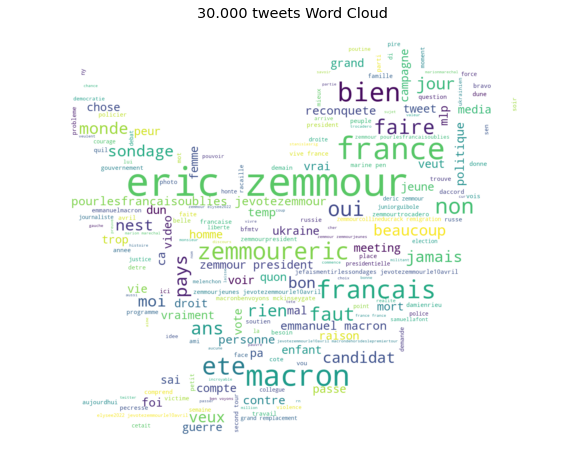

In [ ]:
twitter_mask = np.array(Image.open(r"twitter_logo.jpg"))
tweets_for_wordcloud = ' '.join((clean_tweets_df['tweet'].tolist()))
plt.figure(figsize=(15,8))

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100, mask=twitter_mask, 
    contour_color="steelblue", contour_width=0, background_color="white").generate(tweets_for_wordcloud)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('30.000 tweets Word Cloud')
plt.show()

We get the results we excepted: the words "eric" and "zemmour" appear many times, as he is the main interested party. The words "macron", "france", and "candidat" also appear frequently, which is understandable in the context. We also note the appearance of the hasthag "jevotezemmourle10avril" which is also quite recurrent.

#### Ten most frequent words and most frequent bi-grams

Here we start a more detailed analysis: we will determine the 10 most frequent words and the 10 most frequent word pairs.

We start by counting the number of times each word appears with a Counter.

In [ ]:
counter = Counter(" ".join(clean_tweets_df['tweet'].tolist()).split())

In [ ]:
counter.most_common(10)

[('zemmour', 5510),
 ('france', 3782),
 ('eric', 3416),
 ('macron', 2896),
 ('francais', 2070),
 ('bien', 1635),
 ('zemmoureric', 1542),
 ('faire', 1460),
 ('jevotezemmourle10avril', 1327),
 ('jevotezemmour', 1191)]

Text(0.5, 1.0, '10 most frequent words')

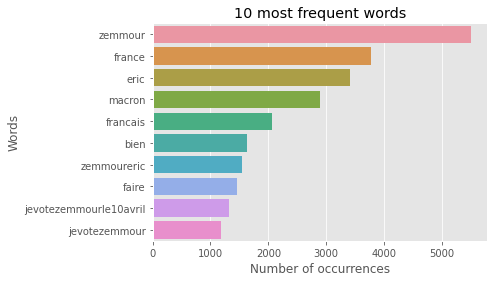

In [ ]:
indexes = [counter.most_common(10)[i][0] for i in range(10)]
values = [counter.most_common(10)[i][1] for i in range(10)]

sns.barplot(y=indexes, x=values)
plt.xlabel('Number of occurrences')
plt.ylabel('Words')
plt.title('10 most frequent words')

We do the same tjing for the most frequent bi-grams

In [ ]:
pairs_counter = Counter(ngrams(" ".join(clean_tweets_df['tweet'].tolist()).split(),2))

Text(0, 0.5, 'Words')

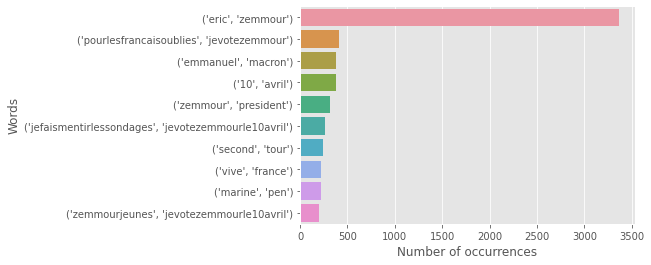

In [ ]:
pairs_df = pd.DataFrame(pairs_counter.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)

sns.barplot(data=pairs_df.head(10), x='frequency', y='pairs')
plt.xlabel('Number of occurrences')
plt.ylabel('Words')

#### Tweet and words length analysis

Text(0.5, 0, 'Words lenght')

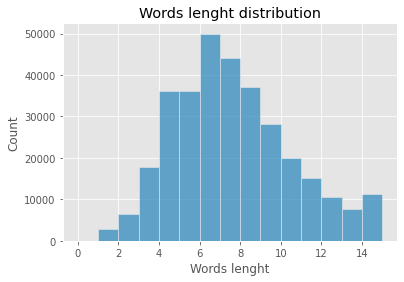

In [ ]:
tokenize_tweets = " ".join(clean_tweets_df['tweet'].tolist()).split()
word_lenghts = [len(word) for word in tokenize_tweets]

sns.histplot(word_lenghts, bins=[i for i in range(16)])
plt.title('Words lenght distribution')
plt.xlabel('Words lenght')

In [ ]:
len_tweets_tf = tweets_df.tweet.map(lambda x : len(x.split()))
len_tweets_tf.mean()

20.724241612336638

The tweets have an average length of 20 words.

In [ ]:
x = len_tweets_tf.values
unique, counts = np.unique(x, return_counts=True)

Text(0, 0.5, 'Count')

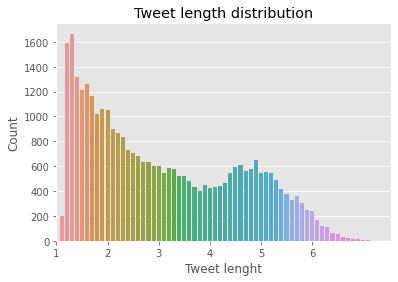

In [ ]:
sns.barplot(x=unique, y=counts)
plt.xticks([i*10 - 1 for i in range(6) ])
plt.title('Tweet length distribution')
plt.xlabel('Tweet lenght')
plt.ylabel('Count')

## LSTM Baseline Model
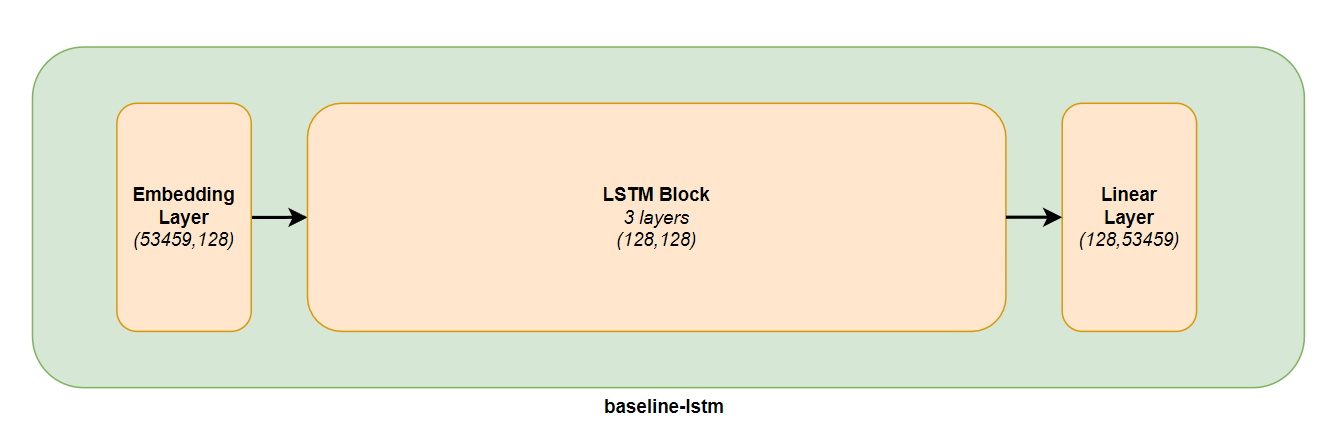

#### Imports

In [ ]:
import torch
from collections import Counter
import pandas as pd
from torch import nn, optim
from torch.utils.data import DataLoader
import numpy as np
from time import time


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#### Model Definition

In [ ]:
class BaselineModel(nn.Module):
    def __init__(self, dataset, lstm_size=128, embedding_dim=128, num_layers=3):
        super(BaselineModel, self).__init__()
        self.lstm_size = lstm_size
        self.embedding_dim = embedding_dim
        self.num_layers=3

        vocab_size = len(dataset.uniq_words)

        self.embedding = nn.Embedding(
                num_embeddings=vocab_size,
                embedding_dim=self.embedding_dim
        )
        self.lstm = nn.LSTM(
            input_size = self.embedding_dim,
            hidden_size = self.lstm_size,
            num_layers=self.num_layers,
            dropout=0.2
        )
        self.fc = nn.Linear(self.lstm_size, vocab_size)

    def forward(self, x, prev_state):
        embed = self.embedding(x)
        output, state = self.lstm(embed, prev_state)
        logits = self.fc(output)
        return(logits, state)
    
    def init_state(self, sequence_length):
        return (torch.zeros(self.num_layers, sequence_length, self.lstm_size).to(device),
                torch.zeros(self.num_layers, sequence_length, self.lstm_size).to(device))



#### Dataset class

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, sequence_length):
        self.sequence_length = sequence_length
        self.words = self.load_words()
        self.uniq_words = self.get_uniq_words()

        self.index_to_word = {index: word for index, word in enumerate(self.uniq_words)}
        self.word_to_index = {word: index for index, word in enumerate(self.uniq_words)}
        self.words_indexes = [self.word_to_index[w] for w in self.words]

    def load_words(self):
        train_df = pd.read_csv('clean_tweets.csv')
        text = train_df.tweet.str.cat(sep=' ')
        return(text.split(' '))

    def get_uniq_words(self):
        word_counts = Counter(self.words)
        return sorted(word_counts, key=word_counts.get, reverse=True)
    
    def __len__(self):
        return(len(self.words_indexes) - self.sequence_length)

    def __getitem__(self, index):
        return (
            torch.tensor(self.words_indexes[index:index+self.sequence_length]).to(device),
            torch.tensor(self.words_indexes[index+1:index+self.sequence_length+1]).to(device),
        )


#### Helper functions

In [ ]:
def train(dataset, model, batch_size, max_epochs):
    model.train()

    dataloader = DataLoader(dataset, batch_size=batch_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(max_epochs):
        state_h, state_c = model.init_state(dataset.sequence_length)

        for batch, (x,y) in enumerate(dataloader):
            optimizer.zero_grad()

            y_pred, (state_h, state_c) = model(x, (state_h, state_c))
            loss = criterion(y_pred.transpose(1,2), y)

            state_h = state_h.detach()
            state_c = state_c.detach()

            loss.backward()
            optimizer.step()

            if batch % 100 == 0:
                print({ 'epoch': epoch, 'batch': batch, 'loss': loss.item() })


In [ ]:

def predict(dataset, model, text, next_words=100):
    model.eval()

    words = text.lower().split(' ')
    state_h, state_c = model.init_state(len(words))

    for i in range(0, next_words):
        try:
            x = torch.tensor([[dataset.word_to_index[w] for w in words[i:]]]).to(device)
        except:
            words_index = []
            for w in words[i:]:
                if w in dataset.word_to_index:
                    words_index.append(dataset.word_to_index[w])
                else:
                    words_index.append(0)
            x = torch.tensor([words_index]).to(device)
        y_pred, (state_h, state_c) = model(x, (state_h, state_c))

        last_word_logits = y_pred[0][-1]
        p = torch.nn.functional.softmax(last_word_logits, dim=0).detach().cpu().numpy()
        word_index = np.random.choice(len(last_word_logits), p=p)
        words.append(dataset.index_to_word[word_index])

    words[0] = words[0][0].upper() + words[0][1:]
    return " ".join(words)

In [ ]:
dataset = Dataset(sequence_length=4)
baseline_model = BaselineModel(dataset).to('cuda')

#### Training

In [ ]:
#already launched (other colab)
train(dataset, baseline_model, batch_size=256, max_epochs=10)

{'epoch': 0, 'batch': 0, 'loss': 10.88022232055664}
{'epoch': 0, 'batch': 100, 'loss': 8.00598430633545}
{'epoch': 0, 'batch': 200, 'loss': 7.740074157714844}
{'epoch': 0, 'batch': 300, 'loss': 7.6660003662109375}
{'epoch': 0, 'batch': 400, 'loss': 8.33830451965332}
{'epoch': 0, 'batch': 500, 'loss': 7.581180095672607}
{'epoch': 0, 'batch': 600, 'loss': 7.826430320739746}
{'epoch': 0, 'batch': 700, 'loss': 7.653970718383789}
{'epoch': 0, 'batch': 800, 'loss': 7.891782760620117}
{'epoch': 0, 'batch': 900, 'loss': 7.44724702835083}
{'epoch': 0, 'batch': 1000, 'loss': 7.590783596038818}
{'epoch': 0, 'batch': 1100, 'loss': 6.685451984405518}
{'epoch': 0, 'batch': 1200, 'loss': 6.78096866607666}
{'epoch': 0, 'batch': 1300, 'loss': 7.583277225494385}
{'epoch': 0, 'batch': 1400, 'loss': 8.074395179748535}
{'epoch': 0, 'batch': 1500, 'loss': 7.6117024421691895}
{'epoch': 0, 'batch': 1600, 'loss': 7.837506294250488}
{'epoch': 0, 'batch': 1700, 'loss': 6.977791786193848}
{'epoch': 0, 'batch': 1800, 'loss': 6.292782783508301}
{'epoch': 0, 'batch': 1900, 'loss': 5.868266582489014}
{'epoch': 0, 'batch': 2000, 'loss': 6.574753284454346}
{'epoch': 0, 'batch': 2100, 'loss': 7.0416460037231445}
{'epoch': 0, 'batch': 2200, 'loss': 6.574774742126465}
{'epoch': 0, 'batch': 2300, 'loss': 6.964387893676758}
{'epoch': 0, 'batch': 2400, 'loss': 6.998438358306885}
{'epoch': 0, 'batch': 2500, 'loss': 7.5133056640625}
{'epoch': 1, 'batch': 0, 'loss': 7.561787128448486}
{'epoch': 1, 'batch': 100, 'loss': 6.980541229248047}
{'epoch': 1, 'batch': 200, 'loss': 6.740300178527832}
{'epoch': 1, 'batch': 300, 'loss': 6.7245683670043945}
{'epoch': 1, 'batch': 400, 'loss': 7.596324920654297}
{'epoch': 1, 'batch': 500, 'loss': 6.740650177001953}
{'epoch': 1, 'batch': 600, 'loss': 6.884733200073242}
{'epoch': 1, 'batch': 700, 'loss': 6.673199653625488}
{'epoch': 1, 'batch': 800, 'loss': 6.591437816619873}
{'epoch': 1, 'batch': 900, 'loss': 6.6400465965271}
{'epoch': 1, 'batch': 1000, 'loss': 6.753089427947998}
{'epoch': 1, 'batch': 1100, 'loss': 5.56684684753418}
{'epoch': 1, 'batch': 1200, 'loss': 5.8748626708984375}
{'epoch': 1, 'batch': 1300, 'loss': 6.76731014251709}
{'epoch': 1, 'batch': 1400, 'loss': 7.355986595153809}
{'epoch': 1, 'batch': 1500, 'loss': 6.939228057861328}
{'epoch': 1, 'batch': 1600, 'loss': 7.0462117195129395}
{'epoch': 1, 'batch': 1700, 'loss': 6.384237766265869}
{'epoch': 1, 'batch': 1800, 'loss': 5.286762714385986}
{'epoch': 1, 'batch': 1900, 'loss': 5.02049446105957}
{'epoch': 1, 'batch': 2000, 'loss': 5.990126609802246}
{'epoch': 1, 'batch': 2100, 'loss': 6.2221784591674805}
{'epoch': 1, 'batch': 2200, 'loss': 5.969048976898193}
{'epoch': 1, 'batch': 2300, 'loss': 6.255781650543213}
{'epoch': 1, 'batch': 2400, 'loss': 6.187164783477783}
{'epoch': 1, 'batch': 2500, 'loss': 6.774468898773193}
{'epoch': 2, 'batch': 0, 'loss': 7.090423583984375}
{'epoch': 2, 'batch': 100, 'loss': 6.540998458862305}
{'epoch': 2, 'batch': 200, 'loss': 6.216435432434082}
{'epoch': 2, 'batch': 300, 'loss': 6.247271537780762}
{'epoch': 2, 'batch': 400, 'loss': 6.951733589172363}
{'epoch': 2, 'batch': 500, 'loss': 6.366537570953369}
{'epoch': 2, 'batch': 600, 'loss': 6.553770542144775}
{'epoch': 2, 'batch': 700, 'loss': 6.290159225463867}
{'epoch': 2, 'batch': 800, 'loss': 6.043585300445557}
{'epoch': 2, 'batch': 900, 'loss': 6.171187877655029}
{'epoch': 2, 'batch': 1000, 'loss': 6.3756208419799805}
{'epoch': 2, 'batch': 1100, 'loss': 5.078296661376953}
{'epoch': 2, 'batch': 1200, 'loss': 5.442317008972168}
{'epoch': 2, 'batch': 1300, 'loss': 6.384555816650391}
{'epoch': 2, 'batch': 1400, 'loss': 6.8735480308532715}
{'epoch': 2, 'batch': 1500, 'loss': 6.528396129608154}
{'epoch': 2, 'batch': 1600, 'loss': 6.585992813110352}
{'epoch': 2, 'batch': 1700, 'loss': 5.875509738922119}
{'epoch': 2, 'batch': 1800, 'loss': 4.647517681121826}
{'epoch': 2, 'batch': 1900, 'loss': 4.35630989074707}
{'epoch': 2, 'batch': 2000, 'loss': 5.535848140716553}
{'epoch': 2, 'batch': 2100, 'loss': 5.730645656585693}
{'epoch': 2, 'batch': 2200, 'loss': 5.669170379638672}
{'epoch': 2, 'batch': 2300, 'loss': 5.76343297958374}
{'epoch': 2, 'batch': 2400, 'loss': 5.619478225708008}
{'epoch': 2, 'batch': 2500, 'loss': 6.2495598793029785}
{'epoch': 3, 'batch': 0, 'loss': 6.670365810394287}
{'epoch': 3, 'batch': 100, 'loss': 6.108097076416016}
{'epoch': 3, 'batch': 200, 'loss': 5.8431620597839355}
{'epoch': 3, 'batch': 300, 'loss': 5.833924770355225}
{'epoch': 3, 'batch': 400, 'loss': 6.6178693771362305}
{'epoch': 3, 'batch': 500, 'loss': 6.000261306762695}
{'epoch': 3, 'batch': 600, 'loss': 6.253753185272217}
{'epoch': 3, 'batch': 700, 'loss': 5.84965181350708}
{'epoch': 3, 'batch': 800, 'loss': 5.741266250610352}
{'epoch': 3, 'batch': 900, 'loss': 5.787789344787598}
{'epoch': 3, 'batch': 1000, 'loss': 6.020694732666016}
{'epoch': 3, 'batch': 1100, 'loss': 4.677035331726074}
{'epoch': 3, 'batch': 1200, 'loss': 5.078598499298096}
{'epoch': 3, 'batch': 1300, 'loss': 6.008080959320068}
{'epoch': 3, 'batch': 1400, 'loss': 6.534117221832275}
{'epoch': 3, 'batch': 1500, 'loss': 6.2274322509765625}
{'epoch': 3, 'batch': 1600, 'loss': 6.059453964233398}
{'epoch': 3, 'batch': 1700, 'loss': 5.528903484344482}
{'epoch': 3, 'batch': 1800, 'loss': 4.244736194610596}
{'epoch': 3, 'batch': 1900, 'loss': 4.025116920471191}
{'epoch': 3, 'batch': 2000, 'loss': 5.347219944000244}
{'epoch': 3, 'batch': 2100, 'loss': 5.319785118103027}
{'epoch': 3, 'batch': 2200, 'loss': 5.444831848144531}
{'epoch': 3, 'batch': 2300, 'loss': 5.4188151359558105}
{'epoch': 3, 'batch': 2400, 'loss': 5.3377203941345215}
{'epoch': 3, 'batch': 2500, 'loss': 5.965663433074951}
{'epoch': 4, 'batch': 0, 'loss': 6.362081527709961}
{'epoch': 4, 'batch': 100, 'loss': 5.896758079528809}
{'epoch': 4, 'batch': 200, 'loss': 5.607247352600098}
{'epoch': 4, 'batch': 300, 'loss': 5.510437488555908}
{'epoch': 4, 'batch': 400, 'loss': 6.427209377288818}
{'epoch': 4, 'batch': 500, 'loss': 5.79246187210083}
{'epoch': 4, 'batch': 600, 'loss': 5.995428085327148}
{'epoch': 4, 'batch': 700, 'loss': 5.569633960723877}
{'epoch': 4, 'batch': 800, 'loss': 5.481082916259766}
{'epoch': 4, 'batch': 900, 'loss': 5.574848175048828}
{'epoch': 4, 'batch': 1000, 'loss': 5.7735114097595215}
{'epoch': 4, 'batch': 1100, 'loss': 4.444206237792969}
{'epoch': 4, 'batch': 1200, 'loss': 4.877700328826904}
{'epoch': 4, 'batch': 1300, 'loss': 5.8063483238220215}
{'epoch': 4, 'batch': 1400, 'loss': 6.2245306968688965}
{'epoch': 4, 'batch': 1500, 'loss': 5.952217102050781}
{'epoch': 4, 'batch': 1600, 'loss': 5.723167896270752}
{'epoch': 4, 'batch': 1700, 'loss': 5.254520416259766}
{'epoch': 4, 'batch': 1800, 'loss': 4.0039825439453125}
{'epoch': 4, 'batch': 1900, 'loss': 3.781599760055542}
{'epoch': 4, 'batch': 2000, 'loss': 5.092082500457764}
{'epoch': 4, 'batch': 2100, 'loss': 5.070706367492676}
{'epoch': 4, 'batch': 2200, 'loss': 5.276702880859375}
{'epoch': 4, 'batch': 2300, 'loss': 5.048638343811035}
{'epoch': 4, 'batch': 2400, 'loss': 5.029026985168457}
{'epoch': 4, 'batch': 2500, 'loss': 5.7358551025390625}
{'epoch': 5, 'batch': 0, 'loss': 6.069591522216797}
{'epoch': 5, 'batch': 100, 'loss': 5.727296352386475}
{'epoch': 5, 'batch': 200, 'loss': 5.40576171875}
{'epoch': 5, 'batch': 300, 'loss': 5.255464553833008}
{'epoch': 5, 'batch': 400, 'loss': 5.852420330047607}
{'epoch': 5, 'batch': 500, 'loss': 5.565791606903076}
{'epoch': 5, 'batch': 600, 'loss': 5.8037638664245605}
{'epoch': 5, 'batch': 700, 'loss': 5.347043991088867}
{'epoch': 5, 'batch': 800, 'loss': 5.214645862579346}
{'epoch': 5, 'batch': 900, 'loss': 5.356907367706299}
{'epoch': 5, 'batch': 1000, 'loss': 5.648312091827393}
{'epoch': 5, 'batch': 1100, 'loss': 4.2832722663879395}
{'epoch': 5, 'batch': 1200, 'loss': 4.6802978515625}
{'epoch': 5, 'batch': 1300, 'loss': 5.650997161865234}
{'epoch': 5, 'batch': 1400, 'loss': 6.095419406890869}
{'epoch': 5, 'batch': 1500, 'loss': 5.788547515869141}
{'epoch': 5, 'batch': 1600, 'loss': 5.4449782371521}
{'epoch': 5, 'batch': 1700, 'loss': 5.082313060760498}
{'epoch': 5, 'batch': 1800, 'loss': 3.754892349243164}
{'epoch': 5, 'batch': 1900, 'loss': 3.517805814743042}
{'epoch': 5, 'batch': 2000, 'loss': 4.943775177001953}
{'epoch': 5, 'batch': 2100, 'loss': 4.970393180847168}
{'epoch': 5, 'batch': 2200, 'loss': 5.148700714111328}
{'epoch': 5, 'batch': 2300, 'loss': 4.954875946044922}
{'epoch': 5, 'batch': 2400, 'loss': 4.838521957397461}
{'epoch': 5, 'batch': 2500, 'loss': 5.525681972503662}
{'epoch': 6, 'batch': 0, 'loss': 5.844669818878174}
{'epoch': 6, 'batch': 100, 'loss': 5.607529163360596}
{'epoch': 6, 'batch': 200, 'loss': 5.223437786102295}
{'epoch': 6, 'batch': 300, 'loss': 5.072149753570557}
{'epoch': 6, 'batch': 400, 'loss': 5.513101100921631}
{'epoch': 6, 'batch': 500, 'loss': 5.362131595611572}
{'epoch': 6, 'batch': 600, 'loss': 5.658308982849121}
{'epoch': 6, 'batch': 700, 'loss': 5.164738655090332}
{'epoch': 6, 'batch': 800, 'loss': 5.010164260864258}
{'epoch': 6, 'batch': 900, 'loss': 5.221933364868164}
{'epoch': 6, 'batch': 1000, 'loss': 5.4857378005981445}
{'epoch': 6, 'batch': 1100, 'loss': 4.1146440505981445}
{'epoch': 6, 'batch': 1200, 'loss': 4.518831729888916}
{'epoch': 6, 'batch': 1300, 'loss': 5.575558185577393}
{'epoch': 6, 'batch': 1400, 'loss': 5.8824262619018555}
{'epoch': 6, 'batch': 1500, 'loss': 5.554536819458008}
{'epoch': 6, 'batch': 1600, 'loss': 5.261428356170654}
{'epoch': 6, 'batch': 1700, 'loss': 4.914008617401123}
{'epoch': 6, 'batch': 1800, 'loss': 3.585949420928955}
{'epoch': 6, 'batch': 1900, 'loss': 3.298964023590088}
{'epoch': 6, 'batch': 2000, 'loss': 4.757589340209961}
{'epoch': 6, 'batch': 2100, 'loss': 4.788046836853027}
{'epoch': 6, 'batch': 2200, 'loss': 5.134875297546387}
{'epoch': 6, 'batch': 2300, 'loss': 4.8351521492004395}
{'epoch': 6, 'batch': 2400, 'loss': 4.752894401550293}
{'epoch': 6, 'batch': 2500, 'loss': 5.385796546936035}
{'epoch': 7, 'batch': 0, 'loss': 5.621257781982422}
{'epoch': 7, 'batch': 100, 'loss': 5.477792263031006}
{'epoch': 7, 'batch': 200, 'loss': 5.071265697479248}
{'epoch': 7, 'batch': 300, 'loss': 4.938272953033447}
{'epoch': 7, 'batch': 400, 'loss': 5.6500444412231445}
{'epoch': 7, 'batch': 500, 'loss': 5.3254804611206055}
{'epoch': 7, 'batch': 600, 'loss': 5.532364368438721}
{'epoch': 7, 'batch': 700, 'loss': 5.017560958862305}
{'epoch': 7, 'batch': 800, 'loss': 4.908287525177002}
{'epoch': 7, 'batch': 900, 'loss': 5.079344749450684}
{'epoch': 7, 'batch': 1000, 'loss': 5.333878993988037}
{'epoch': 7, 'batch': 1100, 'loss': 3.986448049545288}
{'epoch': 7, 'batch': 1200, 'loss': 4.408254623413086}
{'epoch': 7, 'batch': 1300, 'loss': 5.379665851593018}
{'epoch': 7, 'batch': 1400, 'loss': 5.719995021820068}
{'epoch': 7, 'batch': 1500, 'loss': 5.39542818069458}
{'epoch': 7, 'batch': 1600, 'loss': 5.05782413482666}
{'epoch': 7, 'batch': 1700, 'loss': 4.721010684967041}
{'epoch': 7, 'batch': 1800, 'loss': 3.401773452758789}
{'epoch': 7, 'batch': 1900, 'loss': 3.1985321044921875}
{'epoch': 7, 'batch': 2000, 'loss': 4.5657243728637695}
{'epoch': 7, 'batch': 2100, 'loss': 4.695678234100342}
{'epoch': 7, 'batch': 2200, 'loss': 5.0106120109558105}
{'epoch': 7, 'batch': 2300, 'loss': 4.712268829345703}
{'epoch': 7, 'batch': 2400, 'loss': 4.5582966804504395}
{'epoch': 7, 'batch': 2500, 'loss': 5.22044563293457}
{'epoch': 8, 'batch': 0, 'loss': 5.5446367263793945}
{'epoch': 8, 'batch': 100, 'loss': 5.293583393096924}
{'epoch': 8, 'batch': 200, 'loss': 4.966608047485352}
{'epoch': 8, 'batch': 300, 'loss': 4.755065441131592}
{'epoch': 8, 'batch': 400, 'loss': 5.357344150543213}
{'epoch': 8, 'batch': 500, 'loss': 5.183352470397949}
{'epoch': 8, 'batch': 600, 'loss': 5.419939994812012}
{'epoch': 8, 'batch': 700, 'loss': 4.866595268249512}
{'epoch': 8, 'batch': 800, 'loss': 4.707962512969971}
{'epoch': 8, 'batch': 900, 'loss': 4.991548538208008}
{'epoch': 8, 'batch': 1000, 'loss': 5.273094177246094}
{'epoch': 8, 'batch': 1100, 'loss': 3.894996166229248}
{'epoch': 8, 'batch': 1200, 'loss': 4.29498815536499}
{'epoch': 8, 'batch': 1300, 'loss': 5.171748161315918}
{'epoch': 8, 'batch': 1400, 'loss': 5.5275397300720215}
{'epoch': 8, 'batch': 1500, 'loss': 5.234173774719238}
{'epoch': 8, 'batch': 1600, 'loss': 4.984901428222656}
{'epoch': 8, 'batch': 1700, 'loss': 4.5857253074646}
{'epoch': 8, 'batch': 1800, 'loss': 3.284466505050659}
{'epoch': 8, 'batch': 1900, 'loss': 3.0206403732299805}
{'epoch': 8, 'batch': 2000, 'loss': 4.505919933319092}
{'epoch': 8, 'batch': 2100, 'loss': 4.676412105560303}
{'epoch': 8, 'batch': 2200, 'loss': 4.943842887878418}
{'epoch': 8, 'batch': 2300, 'loss': 4.597945690155029}
{'epoch': 8, 'batch': 2400, 'loss': 4.44515323638916}
{'epoch': 8, 'batch': 2500, 'loss': 5.030290603637695}
{'epoch': 9, 'batch': 0, 'loss': 5.433894157409668}
{'epoch': 9, 'batch': 100, 'loss': 5.10935115814209}
{'epoch': 9, 'batch': 200, 'loss': 4.8987860679626465}
{'epoch': 9, 'batch': 300, 'loss': 4.632239818572998}
{'epoch': 9, 'batch': 400, 'loss': 5.0693511962890625}
{'epoch': 9, 'batch': 500, 'loss': 5.060029983520508}
{'epoch': 9, 'batch': 600, 'loss': 5.262693405151367}
{'epoch': 9, 'batch': 700, 'loss': 4.803700923919678}
{'epoch': 9, 'batch': 800, 'loss': 4.549001693725586}
{'epoch': 9, 'batch': 900, 'loss': 4.929704666137695}
{'epoch': 9, 'batch': 1000, 'loss': 5.047267436981201}
{'epoch': 9, 'batch': 1100, 'loss': 3.8070483207702637}
{'epoch': 9, 'batch': 1200, 'loss': 4.185168743133545}
{'epoch': 9, 'batch': 1300, 'loss': 5.121321201324463}
{'epoch': 9, 'batch': 1400, 'loss': 5.387589931488037}
{'epoch': 9, 'batch': 1500, 'loss': 5.116960525512695}
{'epoch': 9, 'batch': 1600, 'loss': 4.822513103485107}
{'epoch': 9, 'batch': 1700, 'loss': 4.513195037841797}
{'epoch': 9, 'batch': 1800, 'loss': 3.1688132286071777}
{'epoch': 9, 'batch': 1900, 'loss': 2.848839521408081}
{'epoch': 9, 'batch': 2000, 'loss': 4.383961200714111}
{'epoch': 9, 'batch': 2100, 'loss': 4.539190769195557}
{'epoch': 9, 'batch': 2200, 'loss': 4.891603946685791}
{'epoch': 9, 'batch': 2300, 'loss': 4.498777866363525}
{'epoch': 9, 'batch': 2400, 'loss': 4.383037090301514}
{'epoch': 9, 'batch': 2500, 'loss': 4.8451056480407715}

In [ ]:
baseline_model.load_state_dict(torch.load("baseline_model"))

<All keys matched successfully>

### Complexity

#### Inference time

In [ ]:
t_list = list()
print("Tweet Generation :\n" + 100 * '-')
for i in range(100):
    
    y = "La France"
    t1=time()
    y_pred = predict(dataset, baseline_model, text=y, next_words=20)
    t2=time()
    inf_time = t2-t1
    t_list.append(inf_time)
    
    print(y_pred)
    print('Generation took {} secs'.format(inf_time))
    print('\n')

Tweet Generation :
----------------------------------------------------------------------------------------------------
La france apprenez des candidat français de son chimère et me démotiver. les classements, le centre qui est compte avec sa guerre
Generation took 0.0647268295288086 secs


La france nouveau qu’on vivent ton replay et qui s’est ! un trou et des votes. #macronbenvoyons pécresse a entonné macron aujourd’hui
Generation took 0.0659182071685791 secs


La france l’ukraine monsieur nous devons pas devenir de vivre et les classes. je protègerai les français. » #zemmourcroissance je suis aussi
Generation took 0.08796572685241699 secs


La france croyez-moi, rt grâce aux français sont extrêmement français et leurs lits de gauche. et à mes bénévoles en écoute par
Generation took 0.07086801528930664 secs


La france pour juste permettre côtés ? qui pense qu’elle protégera faire seulement cette culture normale de ma lutte dans nos produits
Generation took 0.07012009620666504 secs



In [ ]:
sum(t_list)

6.244017601013184

#### Parameters

In [ ]:
baseline_model.eval()

BaselineModel(
  (embedding): Embedding(53469, 128)
  (lstm): LSTM(128, 128, num_layers=3, dropout=0.2)
  (fc): Linear(in_features=128, out_features=53469, bias=True)
)

In [ ]:
model_parameters = filter(lambda p: p.requires_grad, baseline_model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
params

14137821

#### Summary

Time

* Number of trainable parameters : 14 137 821
* Inference : the model takes about 6.24 seconds to generate 100 tweets

Memory

* The model takes up 53.93Mb of memory on disk

## GPT2 Double Step Transfert Learning

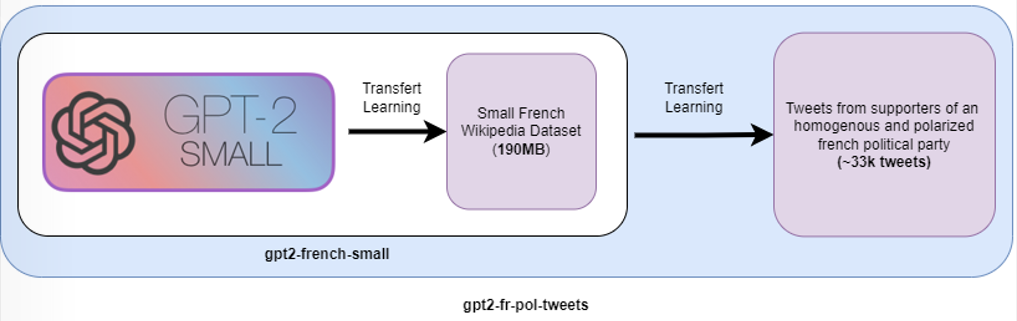


#### Importing required librairies

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import re
from warnings import filterwarnings
import unidecode
filterwarnings('ignore')

### Dataset preparation

In [ ]:
def proc_emoj(tweet):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', tweet)


In [ ]:
def pre_process_tweet(tweet,remove_emojis=False,remove_accents=False):
    # remove \n from the end after every sentence
    tweet = tweet.strip('\n')
    # Remove any word that starts with the symbol @
    tweet = " ".join(filter(lambda x: x[0] != '@', tweet.split()))

    # remove non utf-8 characters
    tweet = bytes(tweet, 'utf-8').decode('utf-8','ignore')
   
    # Remove any URL
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub(r"www\S+", "", tweet)

    # remove colons from the end of the sentences (if any) after removing url
    tweet = tweet.strip()
    tweet_len = len(tweet)
    if tweet_len > 0:
        if tweet[len(tweet) - 1] == ':':
            tweet = tweet[:len(tweet) - 1]

    # Remove any hash-tags symbols
    tweet = tweet.replace('#', '')
    
    # Convert every word to lowercase
    tweet = tweet.lower()
    
    # Remove leading rt tag
    tweet = re.sub('^rt','',tweet)

    
    # remove emojis
    if remove_emojis:
        tweet = proc_emoj(tweet)
        
    if remove_accents:
        tweet = unidecode.unidecode(tweet)
    
    return tweet
    

In [ ]:
def gen_tweets_text_file(df_data,output_path,remove_emojis=False,remove_accents=False):
    f = open(output_path,'w',encoding="utf-8")
    data = ''
    
    for r in df_data.values:
        tweet = pre_process_tweet(r[0],remove_emojis=remove_emojis,remove_accents=remove_accents)
        data+=tweet + "\n"
    data = re.sub('\n{2,}','',data)

   
    f.write(data)
    

In [ ]:
df = pd.read_csv('tweets_extract.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
train, test = train_test_split(df,test_size=0.10)

In [ ]:
gen_tweets_text_file(train,'train_tweets.txt')
gen_tweets_text_file(test,'test_tweets.txt')       

In [ ]:
print("Train dataset length: "+str(len(train)))
print("Test dataset length: "+ str(len(test)))

Train dataset length: 30231
Test dataset length: 3360


In [ ]:
train_data_path = 'train_tweets.txt'
test_data_path = 'test_tweets.txt'

### Get french finetuned gpt2 model tokenizer

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("dbddv01/gpt2-french-small")

Downloading:   0%|          | 0.00/842 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/858k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/517k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/387 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/611 [00:00<?, ?B/s]

In [ ]:
from transformers import TextDataset,DataCollatorForLanguageModeling

def load_dataset(train_path,test_path,tokenizer):
    train_dataset = TextDataset(
          tokenizer=tokenizer,
          file_path=train_path,
          block_size=128)
     
    test_dataset = TextDataset(
          tokenizer=tokenizer,
          file_path=test_path,
          block_size=128)   
    
    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer, mlm=False,
    )
    return train_dataset,test_dataset,data_collator

train_dataset,test_dataset,data_collator = load_dataset(train_data_path,test_data_path,tokenizer)

### Initialization of the `Trainer` object associated with our model

In [ ]:
from transformers import Trainer, TrainingArguments,AutoModelWithLMHead

model = AutoModelWithLMHead.from_pretrained("dbddv01/gpt2-french-small")


training_args = TrainingArguments(
    output_dir="./gpt2-fr-pol-tweets",
    overwrite_output_dir=True, 
    num_train_epochs=10, 
    per_device_train_batch_size=32, 
    per_device_eval_batch_size=64,  
    eval_steps = 400, 
    save_steps=800, 
    warmup_steps=500,
    prediction_loss_only=True,
    )


trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

Downloading:   0%|          | 0.00/510M [00:00<?, ?B/s]

### Training

In [ ]:
#already launched (other colab)
trainer.train()

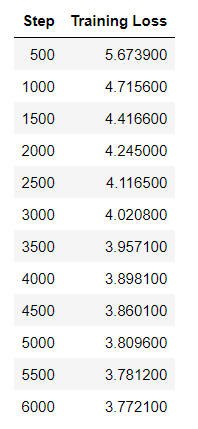

In [ ]:
trainer.save_model()

### Tweet generation and Decoding strategies 

The idea of this section is to explore some of the decoding strategies researches have devised in order to generate results that are more fluent. In order to be aligned with the philosophy of brievity of twitter, the fact that we want to keep the task simple enough that we have an idea and one or two sentences related to it, we'll generate phrases with a max_length of 20 (tokens). This fits will with the fact that the average tweet size in the dataset is pretty low ( around 20 characters) 

#### Inference mode

In [ ]:
from transformers import Trainer, TrainingArguments,AutoModelWithLMHead
model = AutoModelWithLMHead.from_pretrained('./gpt2-fr-pol-tweets/gpt2-fr-pol-tweets')
tokenizer = AutoTokenizer.from_pretrained("dbddv01/gpt2-french-small")
model.to('cpu')

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): Laye

##### Contextual seed for generation

To have some capacity of comparaison between the decoding methods, we'll use the same context seed through this entire section.

The chosen seed is calibrated with the thematic constellation that is used by the chosen political supporters on twitter.

In [ ]:
input_ids = tokenizer.encode('La france',return_tensors='pt')

#### Greedy Search

Classical decoding framework by which we select the word the hifhest conditionnal probabilitity at each timestep $t$ such that : 
$w_t = argmax_{w}P(w | w_{1:t-1})$

In [ ]:


# generate text until the output length (which includes the context length) reaches 25
greedy_output = model.generate(input_ids, max_length=20)

print("Tweet Generation :\n" + 100 * '-')
print(tokenizer.decode(greedy_output[0]))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Tweet Generation :
----------------------------------------------------------------------------------------------------
La france est une terre d’accueil. il faut que les français fassent le choix. je


The generated tweets seems somewhat decent. The semantics is sometimes off but structuraly it seems that the model has captured some of the themes and phraseological features of this political group discourse. This is interesting, especially when considering the few epochs we trained the model on.T

The main drawback with greedy seach is that it can miss high conditionnal probability words that are behind low conditionnal probability words in the graph.

To overcome this issue, we can use beam search.


#### Beam Seach

Here, at each timestep $t$ , we keep the most likely sequence of words (beam). Finally, we end up choosing the highest condtionnal probability sequence overall.

In [ ]:
# here we keep the 3 most likely beams in memory at each time step => we end up with 3 sequences to choose from
beam_output = model.generate(
    input_ids,  
    max_length=20, 
    num_beams=3, 
    early_stopping=True,
    num_return_sequences=3
)

print("Tweet Generation :\n" + 100 * '-')

for tw in beam_output:
    
    print(tokenizer.decode(tw, skip_special_tokens=True))
    print('\n')

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Tweet Generation :
----------------------------------------------------------------------------------------------------
La france doit être plus vigilante, et reconsidérer sa coopération avec certains pays francophones, qui


La france doit être plus vigilante, et reconsidérer sa coopération avec certains pays francophones. 


La france doit être plus vigilante, et reconsidérer sa coopération avec certains pays francophones. cela




More interesting and fluent result. The 3 highest scoring beams are very semilar to one another, this is due to the fact that we only use a few of them. 

Playing around with this two decoding strategies, we notice that the model quickly starts to repeat itself ( classical problem in NLG => bibliography)

To avoid repeating sequence of words, let's leverage n-gram penalities ( bib) by forcing next words conditionnal probability to 0 if they generate an already seen n-gram.

#### n-gram penalities

In [ ]:
# here no n-gram appears twice
beam_output = model.generate(
    input_ids, 
    max_length=20, 
    num_beams=5, 
    no_repeat_ngram_size=2, 
    early_stopping=True,
    num_return_sequences=3
)

print("Tweet Generation :\n" + 100 * '-')

for tw in beam_output:
    
    print(tokenizer.decode(tw, skip_special_tokens=True))
    print('\n')

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Tweet Generation :
----------------------------------------------------------------------------------------------------
La france doit être plus vigilante, et reconsidérer sa coopération avec certains pays francophones, qui


La france doit être plus vigilante, et reconsidérer sa coopération avec certains pays francophones. 


La france doit être plus vigilante, et reconsidérer sa coopération avec certains pays francophones. cela




For our use case, tweets being short messages, such penality serves our purpose well as it keeps the discourse synthetic. However, for longer generation, it could a problem to not have any repeating n-grams.

### Sampling strategies

Here, we swicth to decoding approaches that leverage randomness in order to introduce some diversity in the tweet generation.

The core idea is to consider the next word $w_t$ as random variable from which we draw a realisation according to the conditionnal probability distribution : $P(w|w_{1:t-1})$.


For the popular top-K sampling, which was adopted in the GPT-2 paper, we simply reduce this random variable support to the top K most likely next words.

Top-p sampling is conceptually slightly different, as it selects the minimum set of next words prediction that account for a chosen threshold probability mass.

Combining top-p and top-K  ( Top-K over a top-p sampling) can be useful as it allows to robustly get rid of outliers without compromising some degree of variety.

###### Top K-sampling

In [ ]:
# set top_k to 20
sample_output = model.generate(
    input_ids, 
    do_sample=True, 
    max_length=20, 
    top_k=20,
    no_repeat_ngram_size=2,
    num_return_sequences=3
)

print("Tweet Generation :\n" + 100 * '-')

for tw in sample_output:
    
    print(tokenizer.decode(tw, skip_special_tokens=True))
    print('\n')

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Tweet Generation :
----------------------------------------------------------------------------------------------------
La france va devoir être vigilante et reconsidérer sa coopération avec certains pays francophones. ce qui


La france doit être à sa place avec la construction d’un barrage à tous les niveaux pour


La france doit arrêter l’assassinat du général qassem soleimani par les forces armées




#### Top P-sampling

In [ ]:
# sample from the 95% most likely words
sample_output = model.generate(
    input_ids, 
    do_sample=True, 
    max_length=20, 
    top_p=0.95, 
    no_repeat_ngram_size=2,
    num_return_sequences=3
)

print("Tweet Generation :\n" + 100 * '-')

for tw in sample_output:
    
    print(tokenizer.decode(tw, skip_special_tokens=True))
    print('\n')

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Tweet Generation :
----------------------------------------------------------------------------------------------------
La france est en situation de blocage économique depuis les traités des français avec la russie et la


La france compte aujourd’hui 636 080 habitants, de burkina faso : une


La france n’est plus une province. c’était uniquement une nation musulmane. rt




#### Top K + Top N + N-Gram penality

In [ ]:
sample_output = model.generate(
    input_ids, 
    do_sample=True, 
    max_length=20, 
    top_p=0.95,
    top_k=20,
    no_repeat_ngram_size=2,
    num_return_sequences=3
)

print("Tweet Generation :\n" + 100 * '-')

for tw in sample_output:
    
    print(tokenizer.decode(tw, skip_special_tokens=True))
    print('\n')

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Tweet Generation :
----------------------------------------------------------------------------------------------------
La france est incapable de s’informer face aux crises d’insécurité. nous avons besoin de


La france va être plus vigilante et reconsidérer le dialogue israélo-palestinien et les dirigeants


La france est en guerre. il n’y a qu’un seul souci. nous devons




We clearly have more diverse results from a generation to another, however it seems that the coherence of the sentences is only marginally improved.
We choose this decoding strategy for evaluation.

### Complexity

#### Inference time

In [ ]:
t_list = list()
print("Tweet Generation :\n" + 100 * '-')
for i in range(100):
    
    input_ids = tokenizer.encode("La France",return_tensors='pt')
    t1=time()
    sample_output = model.generate(
        input_ids, 
        do_sample=True, 
        max_length=20, 
        top_p=0.95,
        top_k=20,
        no_repeat_ngram_size=2,
        num_return_sequences=1
    )
    t2=time()
    inf_time = t2-t1
    t_list.append(inf_time)
    

    for tw in sample_output:
        print(tokenizer.decode(tw, skip_special_tokens=True))
        print('Generation took {} secs'.format(inf_time))
        print('\n')

Tweet Generation :
----------------------------------------------------------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France est la plus grande puissance d’un pays. nous étions en guerre, le peuple français
Generation took 0.5609958171844482 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France, c’est l’ukraine. ça va changer. c'est un pays
Generation took 0.5660009384155273 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France : "en france, le mali est dans la voie des plus basses ». r
Generation took 0.5669987201690674 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France, les pays-bas, c… más mejor no sea no están
Generation took 0.5599980354309082 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France, pays du bien-être! zemmourpatriz demélysa
Generation took 0.5609982013702393 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a été une des rares nations à avoir eu un gouvernement de la part des français et des
Generation took 0.5600013732910156 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France. zemmourlille pouvoirdachat c’est la vie!!! 
Generation took 0.6120035648345947 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France est dans la destruction totale de la république!!! ¿sabías que la
Generation took 0.5909981727600098 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France se prépare à la guerre dans la nuit. rt 💪�
Generation took 0.6019988059997559 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France s’en remettra le masque de son pays à l’envers. je suis un
Generation took 0.5579991340637207 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France veut qu’elle ne devienne un pays-bas. mais ça ne dépend pas de la
Generation took 0.5699989795684814 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a mis fin aux « conflits de race ». cela signifie que les noirs n’ont pas
Generation took 0.5549993515014648 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France est le seul pays à avoir des colonies de merde. ils font la fierté et la
Generation took 0.5589969158172607 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France en a marre de la violence. les français ne peuvent pas se cacher quand le peuple
Generation took 0.5579991340637207 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France ne peut pas aider sa voisine, et le monde en a marre de la violence.
Generation took 0.5720000267028809 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France doit se lever et s'opposer à ce coup d'état, car son pouvoir d
Generation took 0.5640010833740234 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France, en revanche, est la puissance mondiale de la france, qui s’en est
Generation took 0.5619997978210449 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France et les autres pays, c'est la faute de notre-mariar et des
Generation took 0.5559990406036377 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France et la turquie sont à l'œuvre! 😁�
Generation took 0.5689985752105713 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a dit ça depuis quelques jours, a été très bien… on ne pourra pas nous dire
Generation took 0.6339995861053467 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France et les pays arabes se font passer pour l'occident ou l’europe. le
Generation took 0.5729973316192627 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France doit se lever et le monde entier s’opposer à ce coup d'état. le
Generation took 0.5759990215301514 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a besoin d'un bon président pour préserver notre souveraineté, son rayonnement, notre cohésion et
Generation took 0.5629992485046387 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France ne peut plus abandonner l’esclavage, le mali… le ministre des affaires étrangères,
Generation took 0.5629982948303223 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France. je suis guéri. c’est la faute. 👍�
Generation took 0.5599989891052246 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a besoin de plus de moyens et d’autres moyens que nous pour venir défendre nos paysages
Generation took 0.5559980869293213 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France n’a pas les moyens d’organiser les élections présidentielles. le peuple malien doit
Generation took 0.5899989604949951 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France à la fin. je m’accorde a dire que c’est normal qu’on
Generation took 0.5549986362457275 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a besoin de toutes les moyens de défendre son territoire. ce sont les forces internationales qui interviennent
Generation took 0.5639984607696533 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France. a l’heure, un seul pays ne sera pas dans une situation de guerre civile
Generation took 0.5539984703063965 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a besoin de plus d’énergie pour soutenir les agriculteurs. je ne suis pas anti-
Generation took 0.538999080657959 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a toujours attendu que les forces internationales quittent l'europe. c'est vrai qu
Generation took 0.5690016746520996 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France doit nous aider. faceabfm  🤔 i wanted
Generation took 0.5969991683959961 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France. 🤣� ahaha oui, c’est un
Generation took 0.5529985427856445 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France à l’étranger :) je vous souhaite que les français s’en reviennent, à
Generation took 0.584998607635498 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France et le fascisme en afrique : il faut arrêter ce coup d'état. le monde
Generation took 0.6019988059997559 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France est une terre ferme. vous êtes dans un pays de merde. je ne suis pas
Generation took 0.5809981822967529 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a fait barrage, il a eu des conséquences sur les autres pays, sur la planète entière
Generation took 0.5689997673034668 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France est un peuple de la république française... lwili tl226 mgr rash
Generation took 0.6100006103515625 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France. les français c ont le pouvoir, la responsabilité, le devoir de défendre la paix.
Generation took 0.5809998512268066 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France va être mieux avec nous. le covid19bf lwili rt si la
Generation took 0.5669996738433838 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France est une terreau mais c est le pays la plus grande. c’est la fran
Generation took 0.6119961738586426 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France ne peut plus prendre le risque d’être plus vigilant face à ces putschistes.
Generation took 0.5829989910125732 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France est la première puissance d'un état souverain, la seule puissance française, à disposer de
Generation took 0.569998025894165 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France n’est plus à notre portée depuis les années 80. notre capacité de travail est passée
Generation took 0.5659976005554199 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France, la france ou la macronelle? le pays a été mis en danger par
Generation took 0.5639982223510742 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a le choix des militaires putschistes qui vont pouvoir pouvoir défendre le mali, en s
Generation took 0.5759985446929932 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France est le seul pays où la france n'est plus la puissance publique. zemm
Generation took 0.5410006046295166 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a dit « la sécurité a pris un tournant » et « l’afghanistan doit être
Generation took 0.5679993629455566 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France n’est pas la france! le monde en a marre de la violence!
Generation took 0.5619988441467285 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France. les américains ne doivent pas s'attaquer au nucléaire français. nous devons aussi protéger nos
Generation took 0.5639960765838623 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France. c’est quoi que tu veux? le président du faso doit être au courant
Generation took 0.5509989261627197 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France n’a pas réussi. l’ukraine est mal partie. la france a
Generation took 0.5779979228973389 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a la paix et la sécurité. nous serons pour le maintien de la prospérité. je
Generation took 0.5759990215301514 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France c est des hommes et des femmes qui ont la nationalité française... 🔴
Generation took 0.5679986476898193 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a la plus grande culture du foot de tous les temps, et la honte à l'
Generation took 0.5539977550506592 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a dit que le nucléaire est un danger. je suis d'accord. l'eur
Generation took 0.5590004920959473 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a besoin de vous pour… le pire c'est une vraie guerre mondiale �
Generation took 0.5509982109069824 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a perdu ses forces depuis le 1er tour. zemmourcollineducrack
Generation took 0.5589981079101562 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France, l'ue et le maroc, le mali sont de parfaits idiots. je
Generation took 0.5619995594024658 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France est incapable de trouver de quoi en faire sa place pour un peuple français. les politiciens français
Generation took 0.5749988555908203 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France est le président de tous les pays. le peuple français, c est la france.
Generation took 0.5699982643127441 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France ne peut plus faire de guerre. ce qui est sûr est que la france ne sera
Generation took 0.5449967384338379 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France n’a plus besoin de tout ce qu’on dit. 😎
Generation took 0.5569968223571777 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a donné ses preuves sur le plan de contrôle d'intérêts. le peuple a besoin de
Generation took 0.5919992923736572 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a besoin de votre appui pour aider la paix et la prospérité mondiale. c'est l
Generation took 0.5809957981109619 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France doit nous faire barrage contre cette épidémie mondiale. le plan de relance pour les femmes et les
Generation took 0.5599980354309082 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France ne doit pas le prendre en compte. le monde en a marre de la violence.
Generation took 0.562997579574585 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France n’a qu’un seul niveau de compétence et de discipline. on peut pas parler
Generation took 0.5559995174407959 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France c'est l'ukraine qui a la plus grande souveraineté sur notre territoire. ce
Generation took 0.55999755859375 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a besoin de beaucoup de moyens financiers pour s'assurer que la souveraineté de l'état
Generation took 0.5649998188018799 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France peut être la meilleure puissance d’un continent occidental. je vote l’ex-d
Generation took 0.5539999008178711 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a perdu un espoir d’un avenir sans nous. il faut que vous, le prochain
Generation took 0.5449979305267334 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France doit arrêter le coup d’etat qui sert d'assault aux forces armées putsch
Generation took 0.545997142791748 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France et les pays francophones ont été à l’œuvre de certains responsables politiques et politiques locaux.
Generation took 0.548999547958374 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a besoin de la paix et de l'amour. zemmourlille pouvoird
Generation took 0.5540032386779785 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France et les autres pays qui n’ont pas des moyens pour leur faire. c’est
Generation took 0.5569987297058105 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France n’aura jamais connu le grand scandale de la dictature. nous sommes d’accord.
Generation took 0.5499939918518066 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France est devenue une terre d’amérique. ce sont les français qui ont la capacité de
Generation took 0.5620009899139404 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France veut faire barrage, elle veut pas les laisser passer. la france veut la fin.
Generation took 0.5659987926483154 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France n’a pas de france. vous le faitesz vous aussi de pays étrangers?
Generation took 0.5519988536834717 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a besoin de une aide alimentaire et d’innovation. pourquoi ne pas les aider? l
Generation took 0.5649971961975098 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France. c’est quoi ça??? j'aime une vidéo : "peu
Generation took 0.5449991226196289 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France c'est une terre à terre, une nation où la plupart de ces gens veulent vivre
Generation took 0.5579991340637207 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France ne veut pas faire de la russie, de l'ukraine, des pays baltes
Generation took 0.5629985332489014 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France ne peut pas se permettre d’être une république en marche. c’est une nécessité
Generation took 0.5539991855621338 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France est dans une guerre civile. ce sont les pays-bas qui se battent, qui chercher
Generation took 0.5629980564117432 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France est l’un des rares pays au monde où l'on est prêt à s’
Generation took 0.5559995174407959 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a besoin du rn pour faire fonctionner ce projet de déontologie et de contrôle du
Generation took 0.5619931221008301 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a pris l'initiative de nous mettre en place un document électoral. il y a une
Generation took 0.5559983253479004 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France peut se mettre d'accord avec elle, mais ce n'est pas le cas pour
Generation took 0.5489988327026367 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France. le monde en a marre de la violence. 🤷�
Generation took 0.5549979209899902 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France est la puissance, l’énergie, le puissance. et l'énergie nous fait pour
Generation took 0.5589985847473145 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a besoin de la paix et de l'espérance.  lwili tl226
Generation took 0.5459980964660645 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France est en guerre civile. le pays ne doit pas se ranger dans une russie. il
Generation took 0.5529978275299072 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a une chance d'être la nation la plus indépendante et la deuxième plus grande puissance mondiale
Generation took 0.5639986991882324 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France a besoin de nous! jevotezemmourle10avril rt lol
Generation took 0.5579984188079834 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France : il faut arrêter l’immigration. ce qui est sûr et certain, c’est
Generation took 0.5479967594146729 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France est dans le choc pétrolier et il doit cesser d’avoir les mêmes mesures que nous.
Generation took 0.5489969253540039 secs




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


La France ne s’en a pas compris. vous êtes sur le point. la france ne
Generation took 0.5609989166259766 secs




In [ ]:
sum(t_list)

56.530866384506226

#### Parameters

In [ ]:
model.eval()

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): Laye

In [ ]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
params

124439808

#### Summary

Time

* Number of trainable parameters : 124 439 808
* Inference : the model takes about 56.5 seconds to generate 100 tweets

Memory

* The model takes up 6Gb of memory on disk

## Evaluation

### Imports

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools

### BERTScore

In [ ]:
from bert_score import score

In [ ]:
baseline_generation_df = pd.read_excel('17k_baseline_generation.xls')

gpt2_generation_df = pd.read_excel('17k_gpt2_generation.xlsx')

context_seeds = [
    'Macron',
    'La France',
    'Zemmour',
    "L'immigration",
    "Le pass sanitaire",
    "Le peuple",
    "Je vote",
    "La république",
    "L'égalité",
    "La liberté",
    "Les racailles",
    "L'abattage rituel",
    "Le voile",
    "L'islamisme",
    "Le wokisme",
    "Le vaccin",
    "Le séparatisme"]

gpt2_candidates = gpt2_generation_df.Generation.to_list()
baseline_candidates = baseline_generation_df.Generation.to_list()

seed_references = [(10*(seed+'-')).split('-')[:-1] for seed in context_seeds]
seed_references = list(itertools.chain.from_iterable(seed_references))

tweet_references = ""
for sentence in pd.read_csv('clean_tweets.csv').dropna().tweet.to_list():
  tweet_references += " " + sentence


##### Results with seeds as reference

###### GPT2

In [ ]:
#calculation takes a very long time
seed_gpt2_P, seed_gpt2_R, seed_gpt2_F1 = score(gpt2_candidates, len(gpt2_candidates) * [seed_references], lang='else', verbose=True)

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/714M [00:00<?, ?B/s]

calculating scores...
computing bert embedding.


  0%|          | 0/265 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/45157 [00:00<?, ?it/s]

done in 692.52 seconds, 4173.17 sentences/sec


In [ ]:
seed_gpt2_F1.mean() # 0.7307

In [ ]:
plt.hist(seed_gpt2_F1, bins=100)
plt.xlabel("score")
plt.ylabel("counts")
plt.title('F1-score repartition for GPT-2 model')
plt.show()

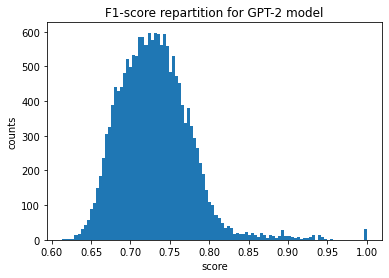

###### LSTM Baseline

In [ ]:
#calculation takes a very long time
seed_baseline_P, seed_baseline_R, seed_baseline_F1 = score(baseline_candidates, len(baseline_candidates) * [seed_references], lang='else', verbose=True)

calculating scores...
computing bert embedding.


  0%|          | 0/266 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/45157 [00:00<?, ?it/s]

done in 809.63 seconds, 3569.55 sentences/sec


In [ ]:
seed_baseline_F1.mean() # 0.6840

In [ ]:
plt.hist(seed_baseline_F1, bins=100)
plt.xlabel("score")
plt.ylabel("counts")
plt.title('F1-score repartition for baseline model')
plt.show()

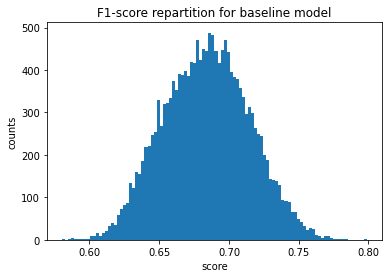

##### Results with the tweets dataset as reference

###### GPT2

In [ ]:
#calculation takes a very long time
tweet_gpt2_P, tweet_gpt2_R, tweet_gpt2_F1 = score(gpt2_candidates, len(gpt2_candidates) * [tweet_references], lang='else', verbose=True)

calculating scores...
computing bert embedding.


  0%|          | 0/265 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
tweet_gpt2_F1.mean() #0.5887

In [ ]:
plt.hist(tweet_gpt2_F1, bins=100)
plt.xlabel("score")
plt.ylabel("counts")
plt.title('F1-score repartition for GPT2-model')
plt.show()

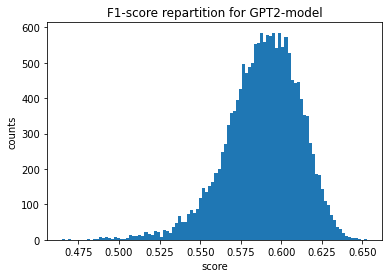

###### LSTM Baseline

In [ ]:
#calculation takes a very long time
tweet_baseline_P, tweet_baseline_R, tweet_baseline_F1 = score(baseline_candidates, len(baseline_candidates) * [tweet_references], lang='else', verbose=True)

In [ ]:
tweet_baseline_F1.mean() #0.6116

In [ ]:
plt.hist(tweet_baseline_F1, bins=100)
plt.xlabel("score")
plt.ylabel("counts")
plt.title('F1-score repartition for baseline model')
plt.show()

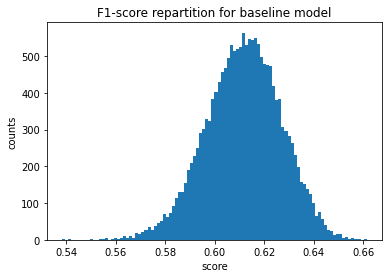